# Assignment on linear regression 

# Importing Necessary Libraries

In [1]:
# Supress warnings
import warnings as warn
warn.filterwarnings("ignore")

In [2]:
# Importing libraries
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

# Importing statsmodels for adding constant
import statsmodels.api as sm

# Importing train_test_split for spliting the data set into train and test set
from sklearn.model_selection import train_test_split

# Importing RFE for feature selection and linear model 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing scaling library for scaling the numerical attributes
from sklearn.preprocessing import MinMaxScaler

# Importing variance inflation factor for checking the vif value wioth probability (p-values)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# metrics r2_score
from sklearn.metrics import r2_score

In [3]:
# Importing the data from local
bike = pd.read_csv("C:/Users/JOY/OneDrive/Documents/MACHINE LEARNING/CSV files 101/Bikedata.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Performing EDA on given data

In [4]:
# Checking for duplicate using unqiue id "instant"
def __duplicate__(row):
    if bike.duplicated(subset=row, keep=False).sum() == 0:
        print("No duplicate")
    else:
        print("There are duplicate row")

__duplicate__('instant')

No duplicate


In [5]:
# Shape
bike.shape

(730, 16)

In [6]:
# Info about data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# describing the data 
bike.describe(percentiles=[0.25, 0.5, 0.75, 0.997, 0.99])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
99%,722.710000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.868050,38.941650,92.795857,27.380948,2931.680000,6787.390000,8163.810000
99.7%,727.813000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.704983,40.239797,96.008452,28.284494,3234.796000,6908.569000,8388.829000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking for null values and cleaning the given data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values occured for treatment.

In [9]:
#Dropping unnecessary columns 
def __DropColumns__(row):
    bike.drop(row, 1, inplace=True)
    print('DROPPED')

__DropColumns__(['instant', 'workingday'])

DROPPED


In [10]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Value count in respective to each attributes
for data in bike.columns:
    print(f'{data}-----------------------------------\n{bike[data].value_counts()}')
    print('----------------------------------------------')

dteday-----------------------------------
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64
----------------------------------------------
season-----------------------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64
----------------------------------------------
yr-----------------------------------
0    365
1    365
Name: yr, dtype: int64
----------------------------------------------
mnth-----------------------------------
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
----------------------------------------------
holiday-----------------------------------
0    709
1     21
Name: holiday, dtype: int64
----------------------------------------------
weekday-----------------------------------
1    105
2    105


In [12]:
# Converting the "dteday" column into datetime type
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')
bike['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
730 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [13]:
# Extracting the day from "dteday" column and renaming the "cnt" column
bike['day'] = bike['dteday'].dt.day
bike.rename(columns={'cnt': 'count'}, inplace=True)

In [14]:
bike['day'].value_counts()

1     24
2     24
28    24
27    24
26    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
13    24
12    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
29    22
30    22
31    14
Name: day, dtype: int64

In [15]:
# dropping the "dteday" not required for the model
__DropColumns__("dteday")

DROPPED


In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,day
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


# Visualising variables

# 1. Visualising discrete varaibles

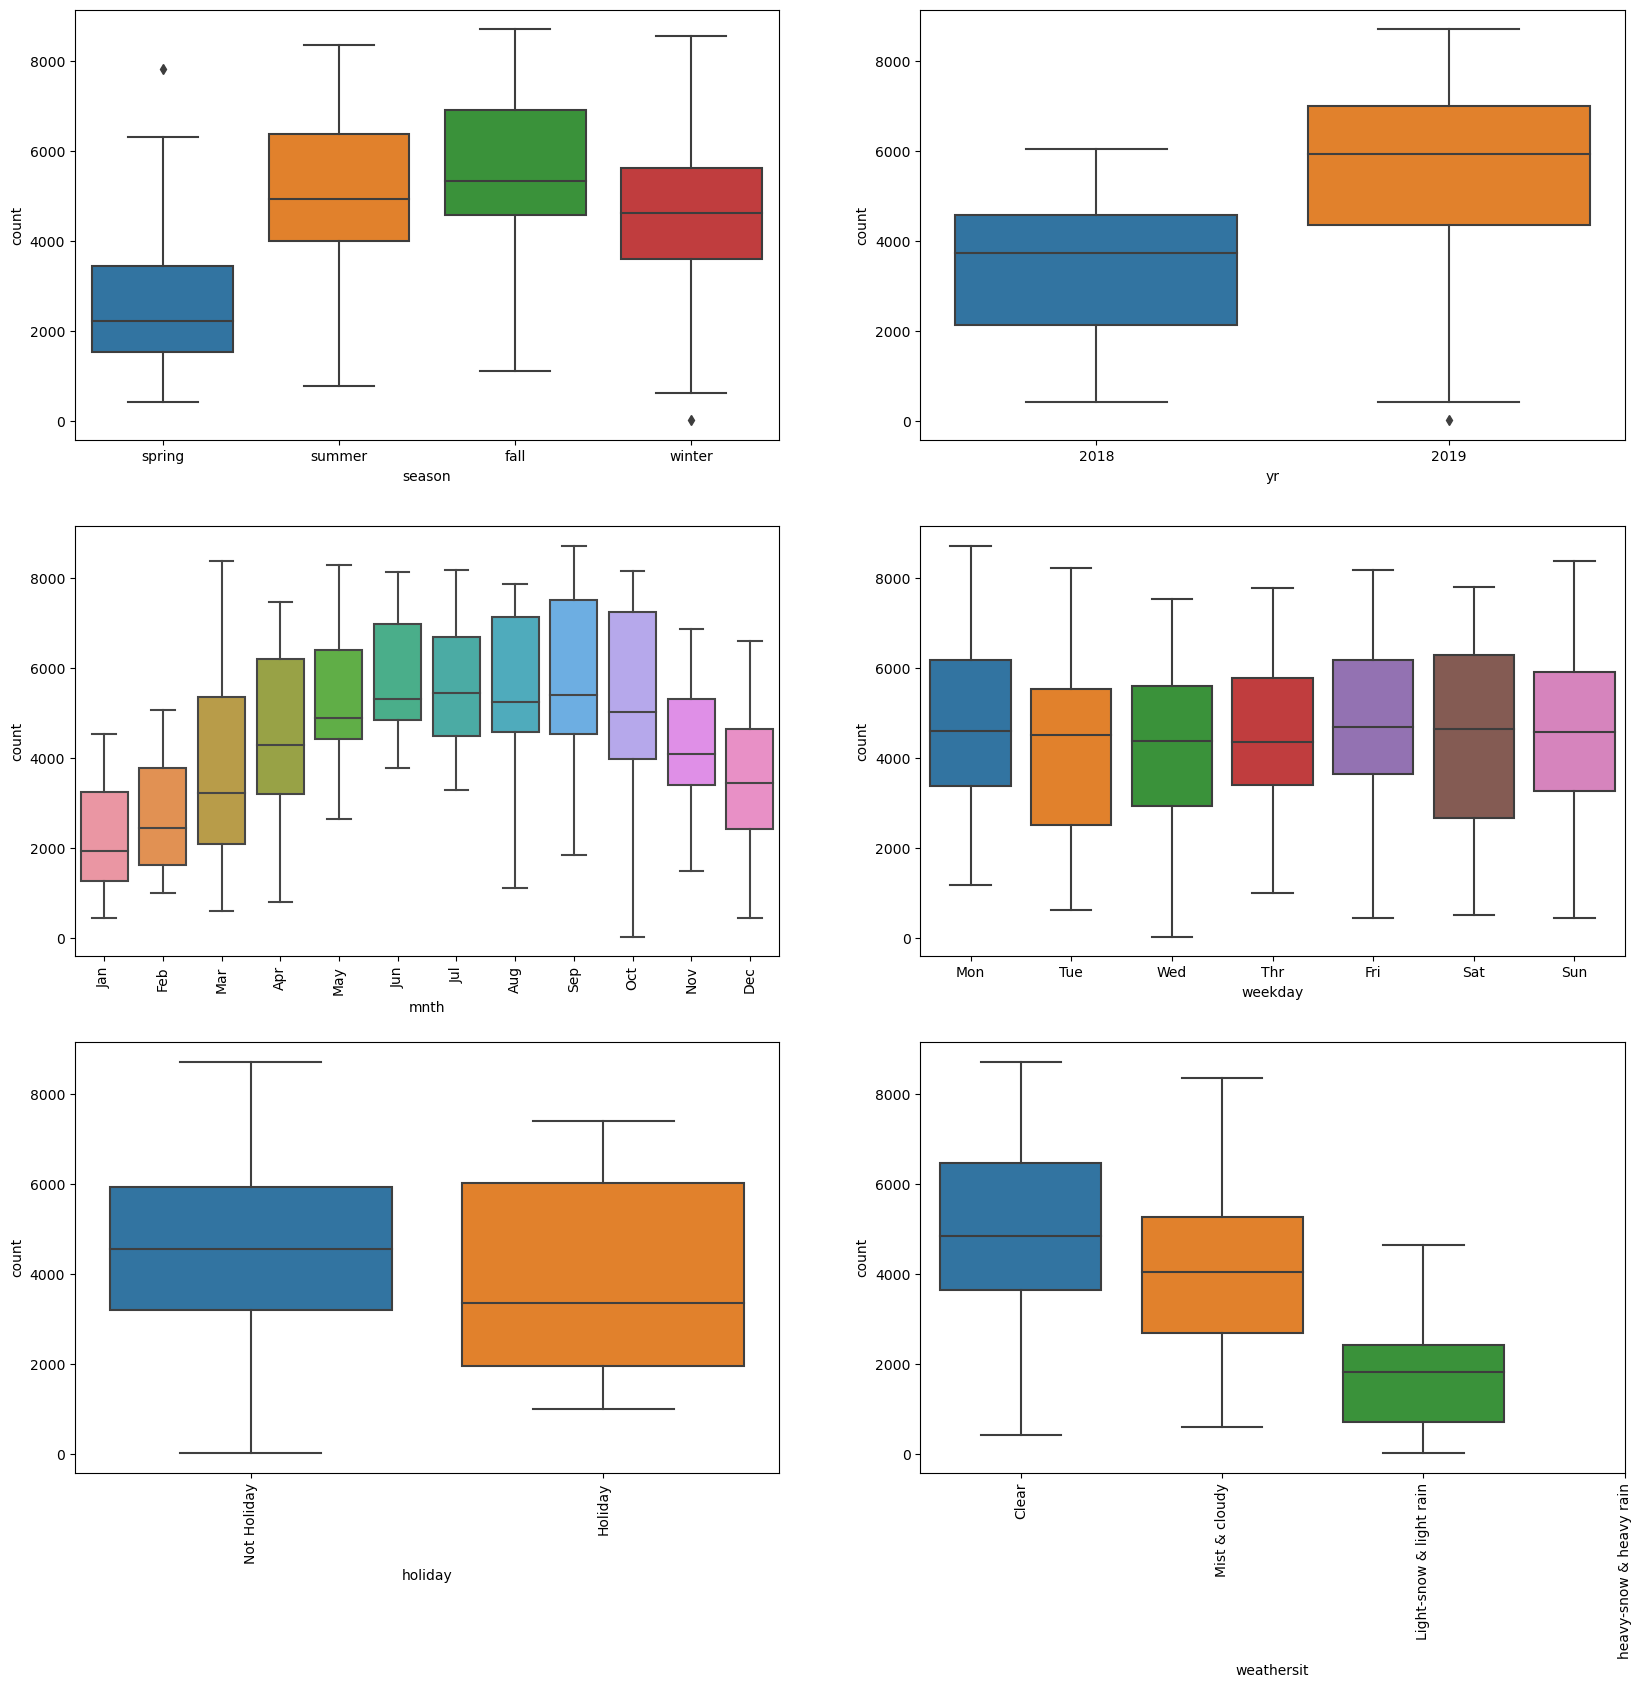

In [17]:
# season
plt.figure(figsize=(20, 19))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.xticks((0, 1, 2, 3), ['spring', 'summer', 'fall', 'winter'])
# year
plt.subplot(3,2,2)
sns.boxplot(x='yr', y='count', data=bike)
plt.xticks((0, 1), [2018, 2019])
# month
plt.subplot(3,2,3)
sns.boxplot(x='mnth', y='count', data=bike)
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
# weekday
plt.subplot(3,2,4)
sns.boxplot(x='weekday', y='count', data=bike)
plt.xticks((0, 1, 2, 3, 4, 5, 6), ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun'])
# holiday
plt.subplot(3,2,5)
sns.boxplot(x='holiday', y='count', data=bike)
plt.xticks((0, 1), ['Not Holiday', 'Holiday'], rotation=90)
# weathersit
plt.subplot(3,2,6)
sns.boxplot(x='weathersit', y='count', data=bike)
plt.xticks((0, 1, 2, 3), ['Clear', 'Mist & cloudy', 'Light-snow & light rain', 'heavy-snow & heavy rain'], rotation=90)
plt.show()

1. In fall, winter and summer season the demand for bike is high apart from spring.
2. In 2019 more bike are used compare with 2018.
3. In the month of september and october more bikes are used.
4. Most people prefer to ride bike in weekdays more than in holidays.
5. Clear sky and cloudly sky people prefer to ride bikes.

# 2. Visualising continuous varaibles

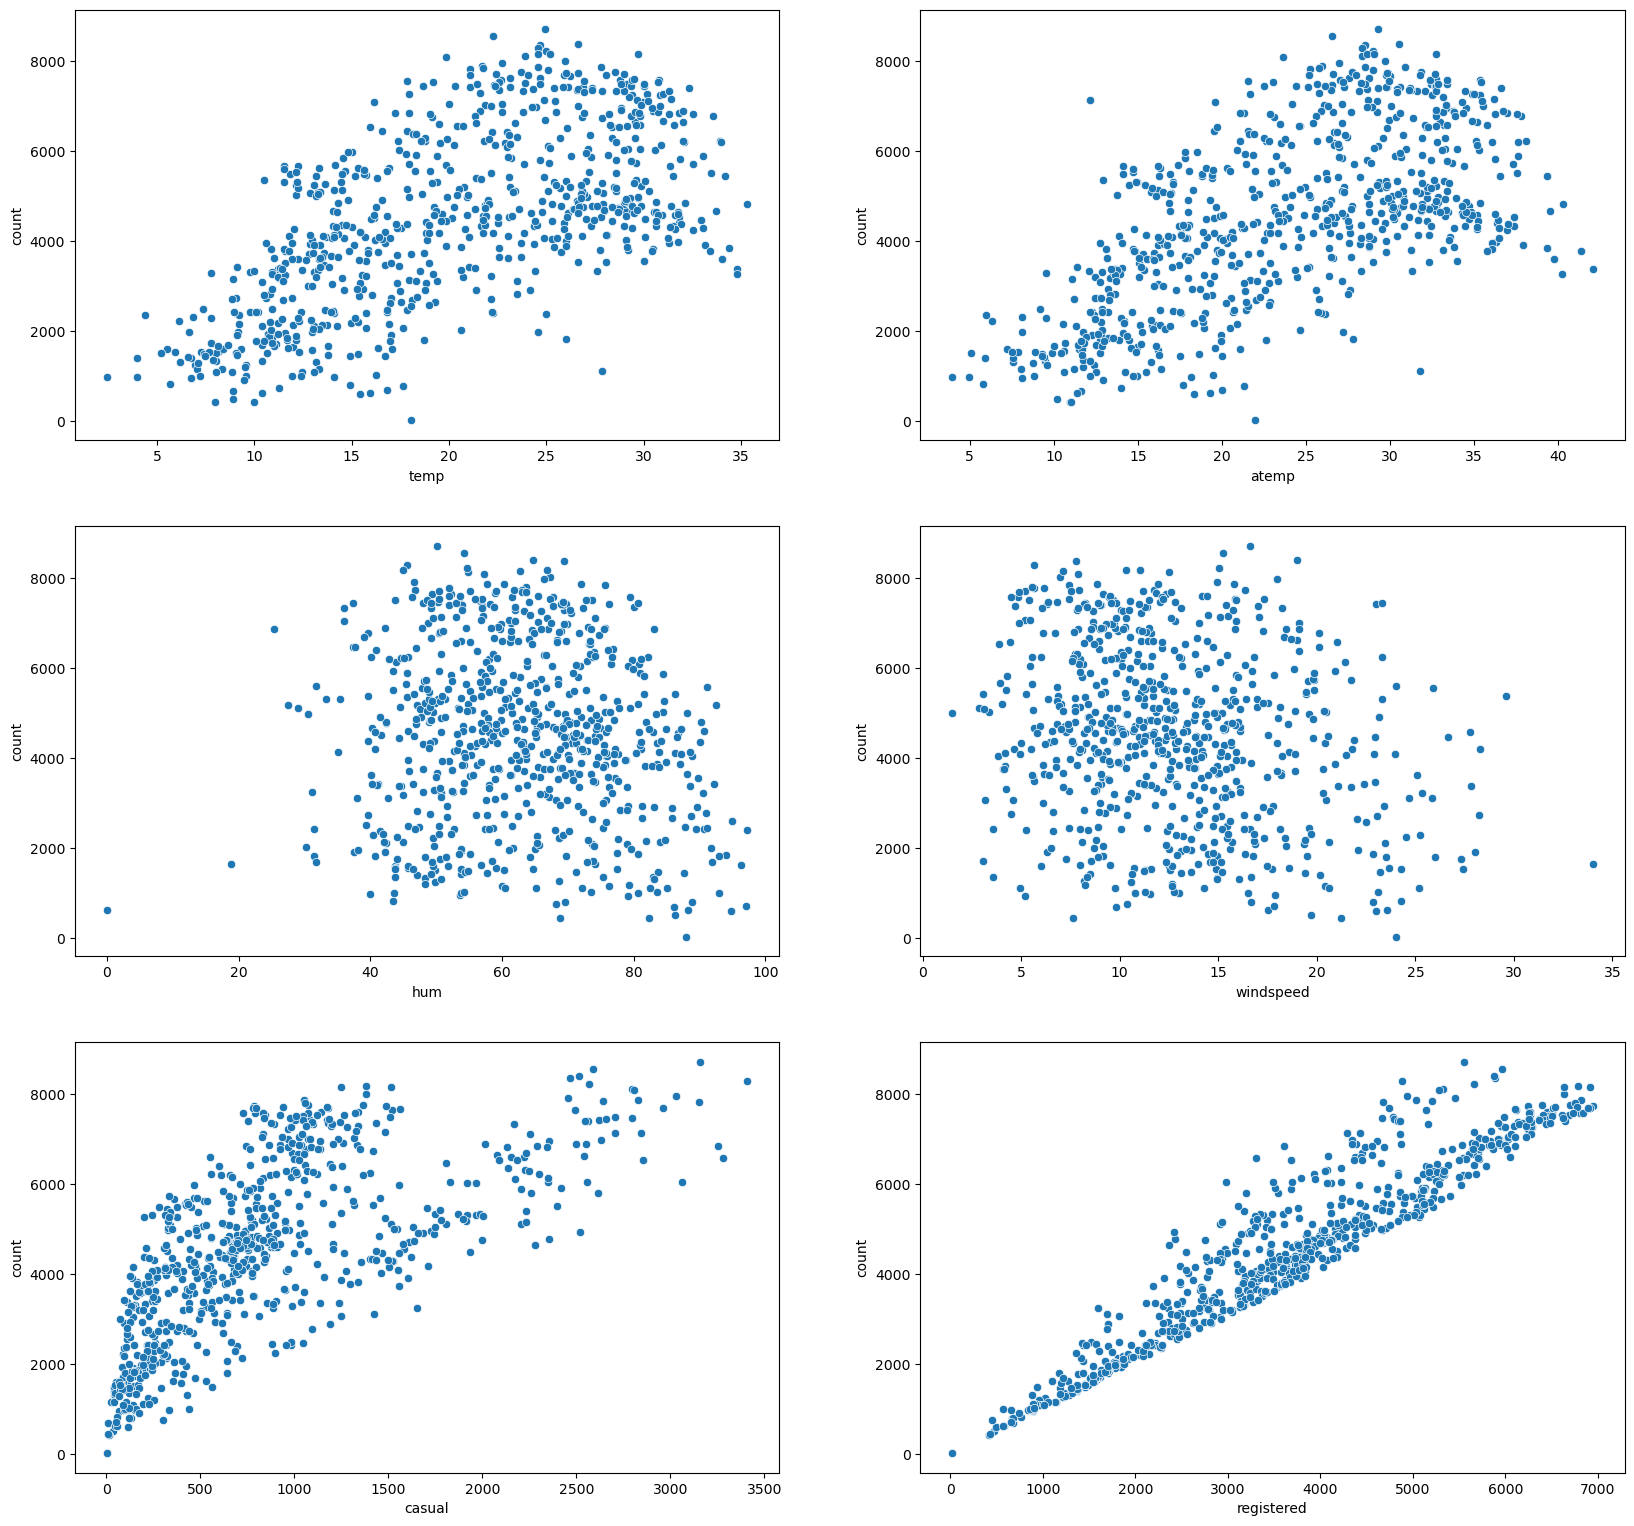

In [18]:
plt.figure(figsize=(20, 19))
#temp
plt.subplot(3,2,1)
sns.scatterplot(x='temp', y='count', data=bike)
#atemp
plt.subplot(3,2,2)
sns.scatterplot(x='atemp', y='count', data=bike)
#hum
plt.subplot(3,2,3)
sns.scatterplot(x='hum', y='count', data=bike)
#windspeed
plt.subplot(3,2,4)
sns.scatterplot(x='windspeed', y='count', data=bike)
#casual
plt.subplot(3,2,5)
sns.scatterplot(x='casual', y='count', data=bike)
#registered
plt.subplot(3,2,6)
sns.scatterplot(x='registered', y='count', data=bike)
plt.show()

1. People prefer to ride bike in high temp and high humidity but in low windspeed. 
2. Dropping the "temp" column as it is same as "atemp".
3. 1-1000 casual people demand for bike but in case of registered people demand more for bikes.

In [19]:
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,day
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


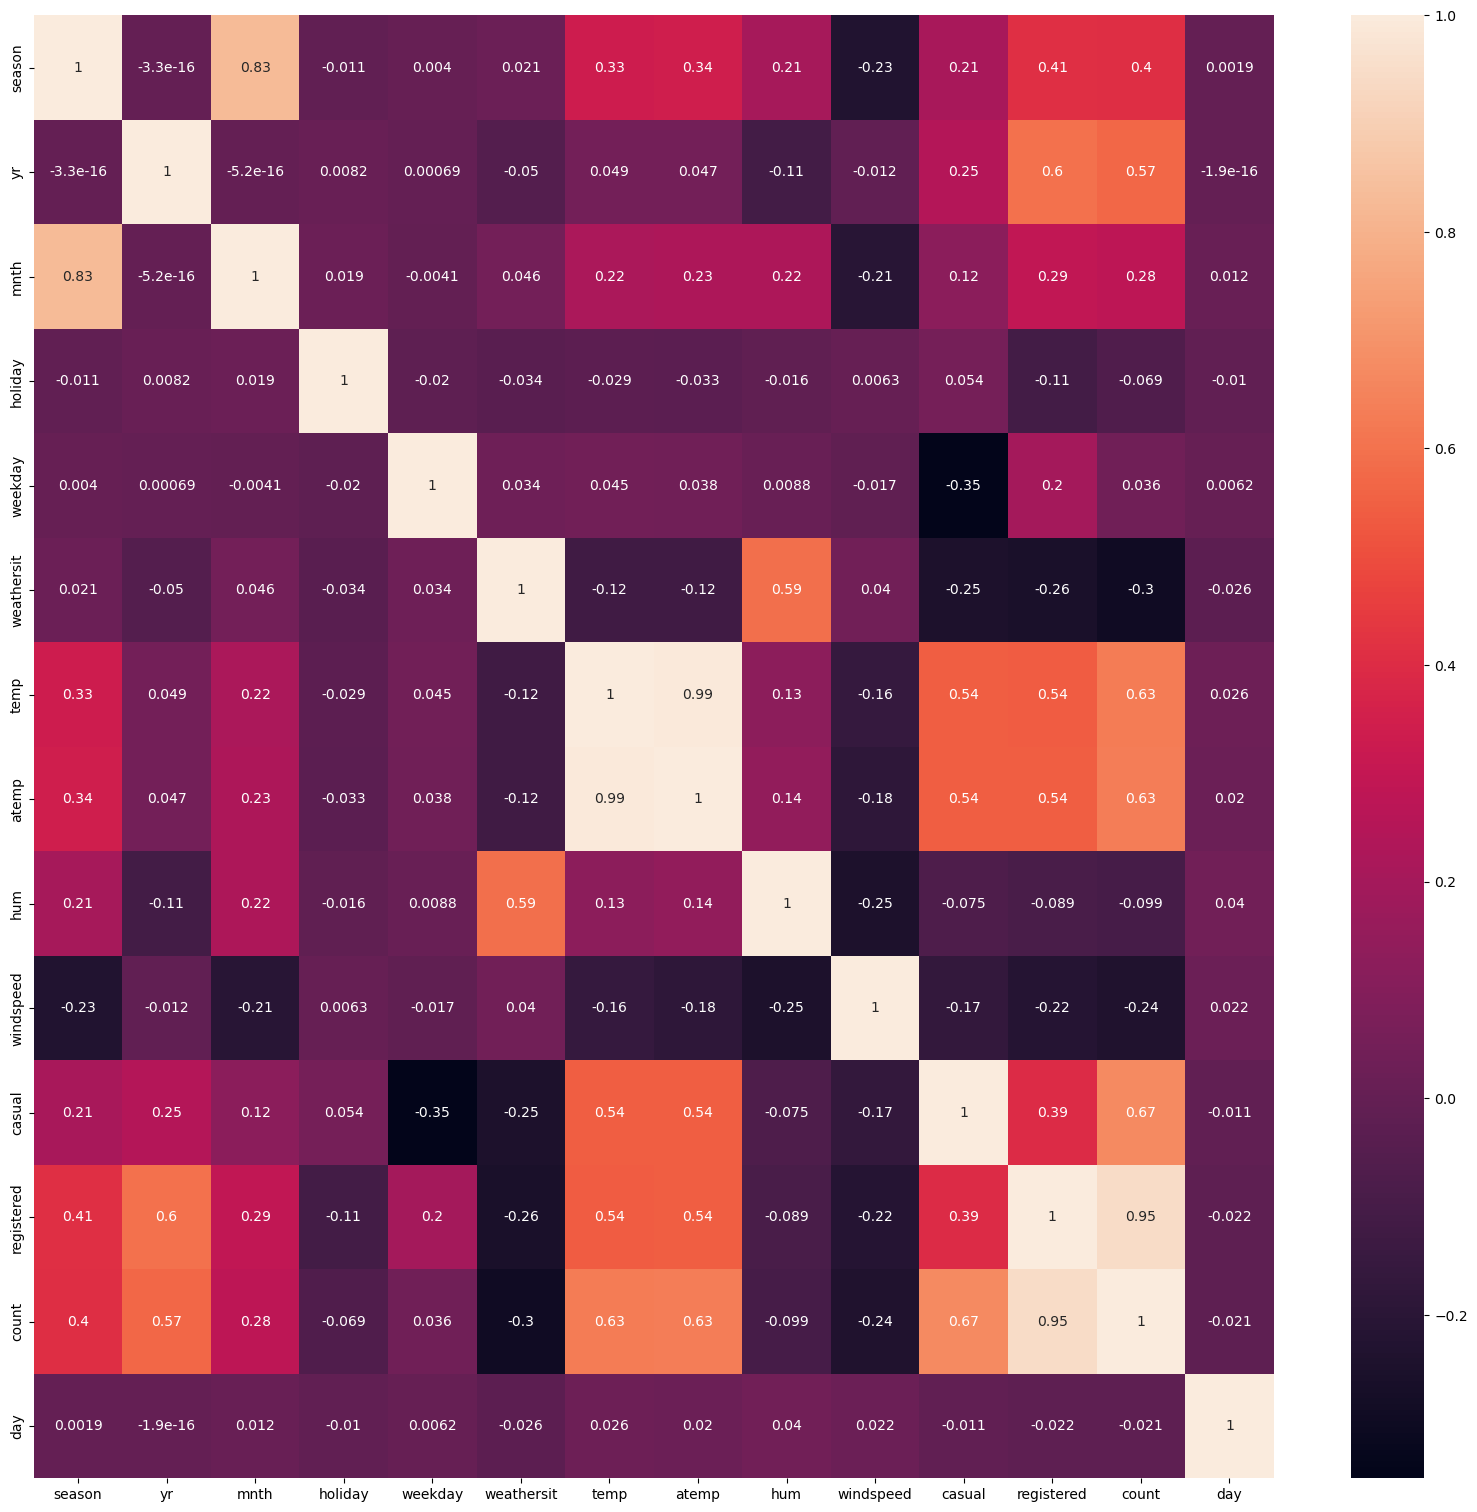

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(20, 19))
sns.heatmap(bike.corr(), annot=True)
plt.show()

1. "day" is highly correlated to other predictor variables.
2. "temp" and "atemp" have same correlation with dependent variable need to drop.

In [21]:
__DropColumns__(['day', 'temp', 'casual', 'registered'])

DROPPED


# Preparing the data

In [22]:
# List of variables to map
# season
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
# weekday
bike['weekday'] = bike['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thr', 5: 'fri', 6: 'sat'})
# mnth
bike['mnth'] = bike['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
# weathersit
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'misty+cloudy', 3: 'light snow + light rain', 4: 'heavy snow + misty + heavy rain'})
bike.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,count
0,spring,0,jan,0,mon,misty+cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,misty+cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thr,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,clear,11.46350,43.6957,12.522300,1600


# Dummy variables encoding

In [23]:
# season
season = pd.get_dummies(bike['season'], drop_first=True)
# mnth
mnth = pd.get_dummies(bike['mnth'], drop_first=True)
# weekday
weekday = pd.get_dummies(bike['weekday'], drop_first=True)
# weathersit
weathersit = pd.get_dummies(bike['weathersit'], drop_first=True)

# Concatenating above frame with bike dataframe
bike = pd.concat([bike, season, mnth, weekday, weathersit], 1)

# Dropping the columns above columns
__DropColumns__(['season', 'mnth', 'weekday', 'weathersit'])

# head
bike.head()

DROPPED


,yr,holiday,atemp,hum,windspeed,count,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thr,tue,wed,light snow + light rain,misty+cloudy
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

# Scaling the high value numerical data 

In [25]:
from sklearn.preprocessing import MinMaxScaler
numerical_data = ['atemp', 'hum', 'windspeed', 'count']
scaler = MinMaxScaler()
df_train[numerical_data] = scaler.fit_transform(df_train[numerical_data])
df_train.head()

,yr,holiday,atemp,hum,windspeed,count,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thr,tue,wed,light snow + light rain,misty+cloudy
653,1,0,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
# Splitting the df_train into X and y train
y_train = df_train.pop('count')
X_train = df_train

# Building the model

# Recursive Feature Elimination

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(estimator = lr, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', True, 1),
 ('mar', False, 8),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 4),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 6),
 ('sun', False, 5),
 ('thr', False, 7),
 ('tue', True, 1),
 ('wed', False, 3),
 ('light snow + light rain', True, 1),
 ('misty+cloudy', True, 1)]

In [29]:
# Columns to select
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'aug', 'dec', 'feb', 'jan', 'jun', 'may', 'nov', 'sep', 'mon',
       'tue', 'light snow + light rain', 'misty+cloudy'],
      dtype='object')

In [30]:
# Columns not to select
X_train.columns[~rfe.support_]

Index(['jul', 'mar', 'oct', 'sat', 'sun', 'thr', 'wed'], dtype='object')

In [31]:
X_train[col].head()

,yr,holiday,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,jun,may,nov,sep,mon,tue,light snow + light rain,misty+cloudy
653,1,0,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# Manual Feature Selection

# Building model using statsmodel, for the detailed statistics

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_col = X_train[col]

# Adding constant
X_train_col_sm1 = sm.add_constant(X_train_col)

regression1 = sm.OLS(y_train, X_train_col_sm1).fit()

# The summary of our linear model
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          4.85e-185
Time:                        08:09:09   Log-Likelihood:                 518.04
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     489   BIC:                            -905.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3475      0.038      9.242      0.000       0.274       0.421
yr                          0.2333      0.008     28.818      0.000       0.217       0.249
holiday                    -0.0834      0.026     -3.251      0.001      -0.134      -0.033
atemp                       0.4084      0.041      9.915      0.000       0.327       0.489
hum                        -0.1511      0.038     -3.937      0.000      -0.227      -0.076
windspeed                  -0.1635      0.026     -6.297      0.000      -0.214      -0.112
spring                     -0.0429      0.023     -1.891      0.059      -0.088       0.002
summer                      0.0406      0.019      2.194      0.029       0.004       0.077
winter                      0.1150      0.019      6.195      0.000       0.079       0.151
aug                         0.0531      0.018      2.959      0.003       0.018       0.088
dec                        -0.0565      0.018     -3.079      0.002      -0.093      -0.020
feb                        -0.0462      0.022     -2.125      0.034      -0.089      -0.003
jan                        -0.0762      0.022     -3.528      0.000      -0.119      -0.034
jun                         0.0273      0.018      1.499      0.134      -0.008       0.063
may                         0.0376      0.019      2.011      0.045       0.001       0.074
nov                        -0.0528      0.019     -2.783      0.006      -0.090      -0.016
sep                         0.1037      0.018      5.862      0.000       0.069       0.138
mon                        -0.0281      0.011     -2.505      0.013      -0.050      -0.006
tue                        -0.0288      0.011     -2.542      0.011      -0.051      -0.007
light snow + light rain    -0.2490      0.027     -9.368      0.000      -0.301      -0.197
misty+cloudy               -0.0600      0.010     -5.726      0.000      -0.081      -0.039
==============================================================================
Omnibus:                       76.899   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.466
Skew:                          -0.713   Prob(JB):                     4.04e-50
Kurtosis:                       5.945   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Variance Inflation Factor

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
3,33.382160,hum
2,18.927585,atemp
5,5.718858,spring
4,4.791609,windspeed
7,4.350402,winter
6,3.858520,summer
11,2.384838,jan
19,2.328353,misty+cloudy
0,2.110234,yr
10,1.922187,feb


In [34]:
# spring have high p-value
X_train_col.drop('spring', 1, inplace=True)

# Rebuilding the model without spring

In [35]:
# Adding constant
X_train_col_sm2 = sm.add_constant(X_train_col)

regression2 = sm.OLS(y_train, X_train_col_sm2).fit()

# The summary of our linear model
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          2.35e-185
Time:                        08:09:10   Log-Likelihood:                 516.19
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     490   BIC:                            -907.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3097      0.032      9.704      0.000       0.247       0.372
yr                          0.2322      0.008     28.681      0.000       0.216       0.248
holiday                    -0.0846      0.026     -3.289      0.001      -0.135      -0.034
atemp                       0.4516      0.034     13.154      0.000       0.384       0.519
hum                        -0.1592      0.038     -4.163      0.000      -0.234      -0.084
windspeed                  -0.1680      0.026     -6.485      0.000      -0.219      -0.117
summer                      0.0625      0.014      4.323      0.000       0.034       0.091
winter                      0.1379      0.014      9.781      0.000       0.110       0.166
aug                         0.0654      0.017      3.901      0.000       0.032       0.098
dec                        -0.0552      0.018     -3.003      0.003      -0.091      -0.019
feb                        -0.0567      0.021     -2.690      0.007      -0.098      -0.015
jan                        -0.0838      0.021     -3.934      0.000      -0.126      -0.042
jun                         0.0260      0.018      1.427      0.154      -0.010       0.062
may                         0.0335      0.019      1.801      0.072      -0.003       0.070
nov                        -0.0478      0.019     -2.538      0.011      -0.085      -0.011
sep                         0.1147      0.017      6.856      0.000       0.082       0.148
mon                        -0.0279      0.011     -2.475      0.014      -0.050      -0.006
tue                        -0.0284      0.011     -2.505      0.013      -0.051      -0.006
light snow + light rain    -0.2444      0.027     -9.208      0.000      -0.297      -0.192
misty+cloudy               -0.0588      0.010     -5.609      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       69.337   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.582
Skew:                          -0.663   Prob(JB):                     2.50e-42
Kurtosis:                       5.694   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
3,26.265024,hum
2,16.958671,atemp
4,4.078190,windspeed
6,3.053433,winter
5,2.967225,summer
18,2.251288,misty+cloudy
0,2.080109,yr
10,1.947917,jan
13,1.857514,nov
12,1.787084,may


In [37]:
# jun have high p-value
X_train_col.drop('jun', 1, inplace=True)

# Rebuilding the model without jun

In [38]:
# Adding constant
X_train_col_sm3 = sm.add_constant(X_train_col)

regression3 = sm.OLS(y_train, X_train_col_sm3).fit()

# The summary of our linear model
regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.5
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          5.21e-186
Time:                        08:09:10   Log-Likelihood:                 515.13
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     491   BIC:                            -911.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3053      0.032      9.601      0.000       0.243       0.368
yr                          0.2316      0.008     28.616      0.000       0.216       0.247
holiday                    -0.0857      0.026     -3.331      0.001      -0.136      -0.035
atemp                       0.4702      0.032     14.777      0.000       0.408       0.533
hum                        -0.1636      0.038     -4.287      0.000      -0.239      -0.089
windspeed                  -0.1700      0.026     -6.563      0.000      -0.221      -0.119
summer                      0.0684      0.014      4.924      0.000       0.041       0.096
winter                      0.1371      0.014      9.722      0.000       0.109       0.165
aug                         0.0597      0.016      3.662      0.000       0.028       0.092
dec                        -0.0526      0.018     -2.875      0.004      -0.089      -0.017
feb                        -0.0537      0.021     -2.561      0.011      -0.095      -0.013
jan                        -0.0796      0.021     -3.770      0.000      -0.121      -0.038
may                         0.0244      0.017      1.394      0.164      -0.010       0.059
nov                        -0.0460      0.019     -2.442      0.015      -0.083      -0.009
sep                         0.1110      0.017      6.708      0.000       0.078       0.143
mon                        -0.0274      0.011     -2.437      0.015      -0.050      -0.005
tue                        -0.0285      0.011     -2.509      0.012      -0.051      -0.006
light snow + light rain    -0.2443      0.027     -9.194      0.000      -0.296      -0.192
misty+cloudy               -0.0587      0.010     -5.586      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       69.033   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.585
Skew:                          -0.671   Prob(JB):                     8.28e-41
Kurtosis:                       5.624   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
3,25.471151,hum
2,14.447549,atemp
4,4.017375,windspeed
6,3.043769,winter
5,2.754305,summer
17,2.248244,misty+cloudy
0,2.069924,yr
10,1.926998,jan
12,1.852713,nov
8,1.631653,dec


In [40]:
# may have high p-value
X_train_col.drop('may', 1, inplace=True)

# Rebuilding the model without may

In [41]:
# Adding constant
X_train_col_sm4 = sm.add_constant(X_train_col)

regression4 = sm.OLS(y_train, X_train_col_sm4).fit()

# The summary of our linear model
regression4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          1.07e-186
Time:                        08:09:10   Log-Likelihood:                 514.12
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     492   BIC:                            -916.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2983      0.031      9.491      0.000       0.237       0.360
yr                          0.2311      0.008     28.556      0.000       0.215       0.247
holiday                    -0.0865      0.026     -3.358      0.001      -0.137      -0.036
atemp                       0.4753      0.032     15.028      0.000       0.413       0.537
hum                        -0.1560      0.038     -4.126      0.000      -0.230      -0.082
windspeed                  -0.1711      0.026     -6.603      0.000      -0.222      -0.120
summer                      0.0768      0.012      6.146      0.000       0.052       0.101
winter                      0.1370      0.014      9.705      0.000       0.109       0.165
aug                         0.0584      0.016      3.589      0.000       0.026       0.090
dec                        -0.0516      0.018     -2.816      0.005      -0.088      -0.016
feb                        -0.0516      0.021     -2.462      0.014      -0.093      -0.010
jan                        -0.0775      0.021     -3.675      0.000      -0.119      -0.036
nov                        -0.0448      0.019     -2.380      0.018      -0.082      -0.008
sep                         0.1100      0.017      6.647      0.000       0.077       0.142
mon                        -0.0282      0.011     -2.503      0.013      -0.050      -0.006
tue                        -0.0290      0.011     -2.554      0.011      -0.051      -0.007
light snow + light rain    -0.2467      0.027     -9.299      0.000      -0.299      -0.195
misty+cloudy               -0.0590      0.011     -5.612      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       68.062   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.363
Skew:                          -0.676   Prob(JB):                     1.37e-38
Kurtosis:                       5.525   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
3,25.378662,hum
2,14.422053,atemp
4,3.943130,windspeed
6,3.040464,winter
5,2.280544,summer
16,2.247527,misty+cloudy
0,2.062335,yr
10,1.926990,jan
11,1.852384,nov
8,1.631621,dec


# "hum" have high VIF dropping the column

In [43]:
X_train_col.drop('hum', 1, inplace=True)

In [44]:
# Adding constant
X_train_col_sm5 = sm.add_constant(X_train_col)

regression5 = sm.OLS(y_train, X_train_col_sm5).fit()

# The summary of our linear model
regression5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          3.40e-184
Time:                        08:09:10   Log-Likelihood:                 505.45
No. Observations:                 510   AIC:                            -976.9
Df Residuals:                     493   BIC:                            -904.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2198      0.025      8.647      0.000       0.170       0.270
yr                          0.2348      0.008     28.730      0.000       0.219       0.251
holiday                    -0.0876      0.026     -3.346      0.001      -0.139      -0.036
atemp                       0.4438      0.031     14.230      0.000       0.382       0.505
windspeed                  -0.1443      0.025     -5.660      0.000      -0.194      -0.094
summer                      0.0714      0.013      5.655      0.000       0.047       0.096
winter                      0.1263      0.014      8.956      0.000       0.099       0.154
aug                         0.0556      0.017      3.365      0.001       0.023       0.088
dec                        -0.0594      0.019     -3.212      0.001      -0.096      -0.023
feb                        -0.0574      0.021     -2.701      0.007      -0.099      -0.016
jan                        -0.0876      0.021     -4.117      0.000      -0.129      -0.046
nov                        -0.0451      0.019     -2.356      0.019      -0.083      -0.007
sep                         0.1029      0.017      6.157      0.000       0.070       0.136
mon                        -0.0284      0.011     -2.484      0.013      -0.051      -0.006
tue                        -0.0326      0.012     -2.830      0.005      -0.055      -0.010
light snow + light rain    -0.2907      0.025    -11.771      0.000      -0.339      -0.242
misty+cloudy               -0.0838      0.009     -9.575      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       67.350   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.013
Skew:                          -0.678   Prob(JB):                     3.28e-37
Kurtosis:                       5.464   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
2,5.126067,atemp
3,3.891121,windspeed
5,2.633927,winter
0,2.059207,yr
4,2.045857,summer
10,1.806237,nov
6,1.597072,aug
15,1.566639,misty+cloudy
7,1.409329,dec
11,1.346958,sep


In [46]:
# "mon", "tue", "nov", "dec" and "feb" dropping november for better prediction little high p-values
X_train_col.drop(['mon', 'tue', 'nov', 'dec', 'feb'], 1, inplace=True)

# "mon", "tue", "nov", "dec" and "feb" have high VIF dropping the column

In [47]:
# Adding constant
X_train_col_sm6 = sm.add_constant(X_train_col)

regression6 = sm.OLS(y_train, X_train_col_sm6).fit()

# The summary of our linear model
regression6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          1.91e-184
Time:                        08:09:11   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1550      0.020      7.734      0.000       0.116       0.194
yr                          0.2343      0.008     28.119      0.000       0.218       0.251
holiday                    -0.0931      0.026     -3.525      0.000      -0.145      -0.041
atemp                       0.5069      0.026     19.390      0.000       0.456       0.558
windspeed                  -0.1410      0.026     -5.468      0.000      -0.192      -0.090
summer                      0.0901      0.012      7.732      0.000       0.067       0.113
winter                      0.1206      0.012     10.339      0.000       0.098       0.144
aug                         0.0649      0.017      3.898      0.000       0.032       0.098
jan                        -0.0463      0.018     -2.565      0.011      -0.082      -0.011
sep                         0.1176      0.017      7.059      0.000       0.085       0.150
light snow + light rain    -0.2791      0.025    -11.138      0.000      -0.328      -0.230
misty+cloudy               -0.0824      0.009     -9.242      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       52.093   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.089
Skew:                          -0.544   Prob(JB):                     1.87e-27
Kurtosis:                       5.147   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
2,4.946231,atemp
3,3.273392,windspeed
0,2.035063,yr
4,1.899990,summer
5,1.566395,winter
6,1.561651,aug
10,1.538336,misty+cloudy
8,1.309136,sep
7,1.222164,jan
9,1.080994,light snow + light rain


In [49]:
# "jan" dropping november for better prediction little high p-values
X_train_col.drop('jan', 1, inplace=True)

In [50]:
# Adding constant
X_train_col_sm7 = sm.add_constant(X_train_col)

regression7 = sm.OLS(y_train, X_train_col_sm7).fit()

# The summary of our linear model
regression7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          3.10e-184
Time:                        08:09:11   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1280      0.017      7.462      0.000       0.094       0.162
yr                          0.2334      0.008     27.876      0.000       0.217       0.250
holiday                    -0.0939      0.027     -3.535      0.000      -0.146      -0.042
atemp                       0.5370      0.023     22.862      0.000       0.491       0.583
windspeed                  -0.1320      0.026     -5.136      0.000      -0.182      -0.081
summer                      0.0978      0.011      8.634      0.000       0.076       0.120
winter                      0.1324      0.011     12.266      0.000       0.111       0.154
aug                         0.0680      0.017      4.069      0.000       0.035       0.101
sep                         0.1207      0.017      7.224      0.000       0.088       0.154
light snow + light rain    -0.2770      0.025    -11.000      0.000      -0.326      -0.228
misty+cloudy               -0.0836      0.009     -9.330      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       51.599   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.201
Skew:                          -0.530   Prob(JB):                     6.50e-28
Kurtosis:                       5.184   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_col.values, data) for data in range(X_train_col.shape[1])]
vif['Features'] = X_train_col.columns
vif = vif.sort_values(by='VIF', ascending=False)
vif

,VIF,Features
2,4.914673,atemp
3,3.047569,windspeed
0,1.999778,yr
4,1.820956,summer
6,1.545924,aug
5,1.503808,winter
9,1.486017,misty+cloudy
7,1.301101,sep
8,1.080773,light snow + light rain
1,1.035915,holiday


In [52]:
# final columns for X train
X_train_col.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter', 'aug', 'sep',
       'light snow + light rain', 'misty+cloudy'],
      dtype='object')

# Residual Analysis of the train data

<Figure size 640x480 with 0 Axes>

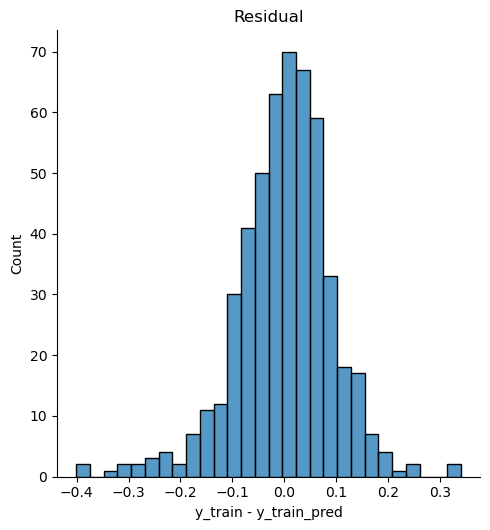

In [53]:
y_train_pred = regression7.predict(X_train_col_sm7)
fig = plt.figure()
residual = y_train - y_train_pred
sns.displot(residual)
plt.title('Residual')
plt.xlabel('y_train - y_train_pred')
plt.show()

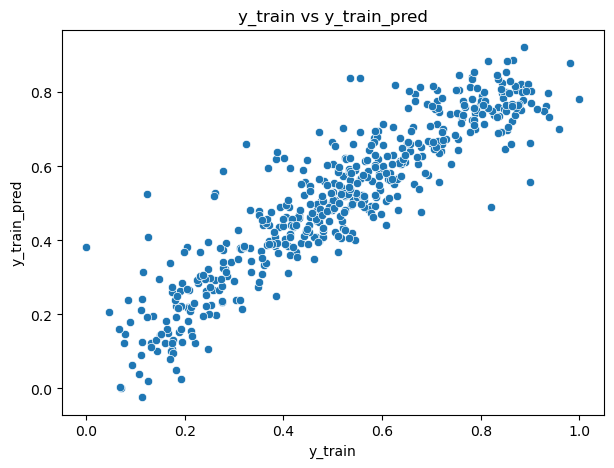

In [54]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x = y_train, y= y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

# Making Predictions

In [55]:
df_test.head()

,yr,holiday,atemp,hum,windspeed,count,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thr,tue,wed,light snow + light rain,misty+cloudy
184,0,1,33.27085,63.7917,5.459106,6043,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,36.04875,59.2083,7.625404,6211,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,22.85230,81.2917,13.250121,2659,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,34.24915,42.4167,13.417286,4780,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,32.19710,30.5000,19.583229,4968,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Applying the scaling on the test sets

In [56]:
numerical_columns = ['atemp', 'hum', 'windspeed', 'count']
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])
df_test.head()

,yr,holiday,atemp,hum,windspeed,count,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thr,tue,wed,light snow + light rain,misty+cloudy
184,0,1,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,0.842587,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,0.795343,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Dividing into X_test and y_test

In [57]:
y_test = df_test.pop('count')
X_test = df_test

In [58]:
#  using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_col = X_test[X_train_col.columns]

# Adding constant
X_test_col_sm = sm.add_constant(X_test_col)

# Making predictions
y_test_pred = regression7.predict(X_test_col_sm)

In [59]:
# finding r2_score of test set
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7937923992707866

In [60]:
# finding r2_score of train set
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8290657459180486

In [61]:
regression7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          3.10e-184
Time:                        08:09:12   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1280      0.017      7.462      0.000       0.094       0.162
yr                          0.2334      0.008     27.876      0.000       0.217       0.250
holiday                    -0.0939      0.027     -3.535      0.000      -0.146      -0.042
atemp                       0.5370      0.023     22.862      0.000       0.491       0.583
windspeed                  -0.1320      0.026     -5.136      0.000      -0.182      -0.081
summer                      0.0978      0.011      8.634      0.000       0.076       0.120
winter                      0.1324      0.011     12.266      0.000       0.111       0.154
aug                         0.0680      0.017      4.069      0.000       0.035       0.101
sep                         0.1207      0.017      7.224      0.000       0.088       0.154
light snow + light rain    -0.2770      0.025    -11.000      0.000      -0.326      -0.228
misty+cloudy               -0.0836      0.009     -9.330      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       51.599   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.201
Skew:                          -0.530   Prob(JB):                     6.50e-28
Kurtosis:                       5.184   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Evaluation

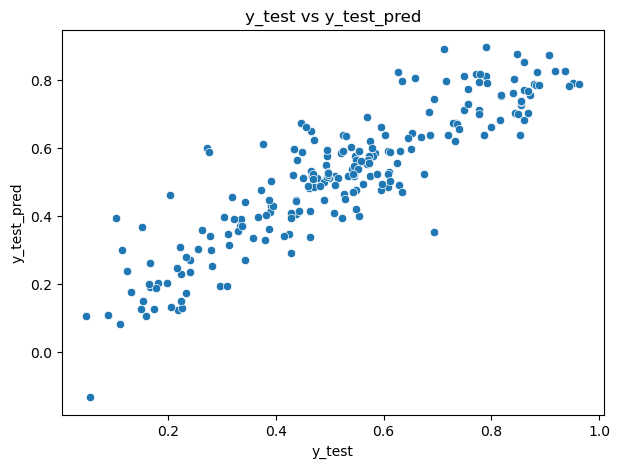

In [62]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x = y_test, y= y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

<Figure size 640x480 with 0 Axes>

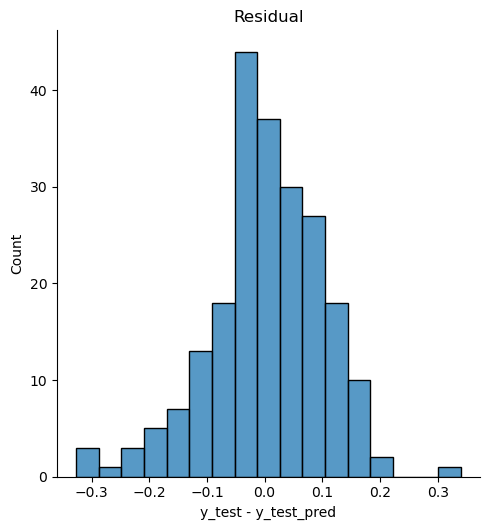

In [63]:
fig = plt.figure()
residual = y_test - y_test_pred
sns.displot(residual)
plt.title('Residual')
plt.xlabel('y_test - y_test_pred')
plt.show()

# Conclusion

1. r2_score of training set is 0.8290657459180486 and testing set is 0.7937923992707866 which means 
   whatever model predict in training set it generalise well on testing.
2. In fall, winter and summer season the demand for bike is high apart from spring.
3. In 2019 more bike are used compare with 2018.
4. In the month of september and october more bikes are used.
5. Most people prefer to ride bike in weekdays more than in holidays.
6. Clear sky and cloudly sky people prefer to ride bikes. 
7. People prefer to ride bike in high temp and high humidity but in low windspeed.
8. Dropping the "temp" column as it is same as "atemp".

# These are the significant columns for predicting model well
['yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter', 'aug', 'sep', 'light snow + light rain', 'misty+cloudy']

# We can see that the equation of our best fitted line is:

count = 0.2334*yr + (-0.0939)*holiday + 0.5370*atemp + (-0.1320)*windspeed + 0.0978*summer + (0.1324)*winter + 0.0680*aug
        + 0.1207*sep + (-0.2770)*light snow + light rain + (-0.0836)*misty+cloudy